<a href="https://colab.research.google.com/github/ASTRONOE/Common_Data_Analysis/blob/KreativStorm/CaseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Data Analysis Hands-On Program - KreativStorm**
##CASE STUDY

##**Does Annual Household Income Play a Role in Minority’s Political Party Identification?**






##`Step 1: Data preparation`

In [ ]:
#install stata package
!pip install pyreadstat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 11.9 MB/s eta 0:00:00


In [ ]:
!pip install scikit_posthocs

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import pyreadstat as prs
import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sb
from google.colab import files, drive
import scipy.stats as stats
from scipy.stats import shapiro, kruskal, chi2_contingency, mannwhitneyu
from pathlib import Path
import os
import scikit_posthocs as sp

In [ ]:
#upload homework data
case_file = files.upload()

Saving BSE_2010.dta to BSE_2010.dta


In [ ]:
#read homework data and meta
Df, meta = prs.read_dta('BSE_2010.dta')

In [ ]:
# Accessing the variable names
print("Variable names:\n", meta.column_names)

# Accessing the variable labels
print("Variable labels:\n", meta.variable_value_labels)

# Accessing the detailed information about each variable
print("Variable information:")
print(meta.column_names_to_labels)

Variable names:
 ['Unqid', 'Country', 'zgor', 'zq88', 'zq89', 'zq90', 'zq91_1', 'zq91_2', 'zq101', 'eq1', 'eq2', 'eq3', 'eq3comb', 'zq106_1', 'eq106_a', 'eq106_c', 'eq106_m', 'eq4', 'eq106_4', 'zq106_5', 'bq9_1', 'bq9_2', 'bq9_3', 'bq9_4', 'bq10', 'bq11a', 'bq11b', 'bq11c', 'bq11d', 'bq11e', 'eq5', 'eq6', 'eq7', 'eq8a', 'eq8b', 'eq8c', 'eq8d', 'eq8e', 'eq8f', 'eq8g', 'eq8h', 'eq8i', 'eq8j', 'eq8k', 'eq9', 'eq10', 'bq17_1', 'bq17_2', 'bq17_3', 'bq17_4', 'bq17_6', 'bq17_5', 'bq17_7', 'bq17_8', 'bq16_2', 'bq16_3', 'bq16_4', 'bq15_1', 'bq15_2', 'bq15_3', 'bq15_4', 'bq15_5', 'eq11', 'eq12', 'bq61', 'bq54_2', 'bq54_3', 'eq13_1', 'eq13_2', 'eq13_3', 'eq13_4', 'bq1', 'bq2_1', 'bq2_2', 'bq3_1', 'bq3_3', 'bq3_4', 'bq3_5', 'bq3_6', 'bq18_1', 'eq18_1a', 'bq18_2', 'eq18_2a', 'bq18_3', 'bq18_4', 'bq18_5', 'bq18_6', 'bq18_7', 'eq14_1', 'eq14_2', 'eq14_3', 'bq21', 'bq22', 'bq23', 'bq24', 'bq25', 'bq40_1', 'bq40_2', 'bq40_3', 'bq40_4', 'bq40_5', 'bq40_6', 'bq41_1', 'bq41_2', 'bq41_3', 'bq41_4', 'bq41_5

In [ ]:
#the whole dataset columnwise
print(Df.shape)
Df.head()

(2787, 637)


,Unqid,Country,zgor,zq88,zq89,zq90,zq91_1,zq91_2,zq101,eq1,...,CitizenadjBA,CitizenadjIn,CitizenadjPa,CitizenadjBang,Citizenadjtotal,Popdensity,Intno,Inteth,Intsex,PSUIdentifier
0,100011,1,7,1,31,1,9,4,8,10,...,138.16,304.94,359.52,74.16,919.58,5828.000000,69073,4,1,1148
1,100013,1,3,2,49,6,1,NaN,3,NaN,...,34.54,26.07,212.52,3.09,295.48,4977.419355,62138,7,1,1149
2,100014,1,3,2,33,1,4,2,8,10,...,34.54,26.07,212.52,3.09,295.48,4977.419355,62138,7,1,1149
3,100015,1,3,2,37,1,2,0,8,10,...,34.54,26.07,212.52,3.09,295.48,4977.419355,62138,7,1,1149
4,100020,1,7,1,45,1,6,2,8,10,...,138.16,304.94,359.52,74.16,919.58,5828.000000,69073,4,1,1148


##`Step 2: Preprocessing and exploratory data analysis`

### Feature selection
We select the features that have quality and might be relevant to the task. Then we replaced the coded column names with readable shortforms. Then we save them into a new dataframe to use for the project.

In [ ]:
#identified relevant features
df = Df[['zqinc', 'zq97', 'zq101', 'bq9_1', 'bq12_1']]
#renamed features for better readability
df = df.rename(columns={'zqinc':'AHIncome', 'zq97':'MSIncome', 'zq101':'Ethnicity', 'bq9_1':'PartyID', 'bq12_1':'Voted2'})
df.head()

,AHIncome,MSIncome,Ethnicity,PartyID,Voted2
0,13,1,8,2,2
1,4,1,3,2,2
2,4,1,8,1,1
3,4,1,8,2,1
4,3,1,8,2,1


### Cleaning out undefined values
We removed values with ambiguous labels such as 'refused', 'not stated', and 'don't know' and replace them with None so as not to interfere with the results in further analysis.

In [ ]:
#removing unstated or unsure values
df['AHIncome'] = df['AHIncome'].replace([-2, -1, 17], None)
df['MSIncome'] = df['MSIncome'].replace([-2, -1, 16], None)
df['Ethnicity'] = df['Ethnicity'].replace([-2, -1, 16, 17, 18, 22], None)
df['PartyID'] = df['PartyID'].replace([-2, -1, 15], None)
df['Voted2'] = df['Voted2'].replace([-2, -1, 4, 5], None)

After removing the undefined values, we counted how many valid values are present in the dataset.

In [ ]:
df_count = pd.DataFrame(df.count(), columns=['Count']).reset_index().rename(columns={'index':'Columns'})
df_count = df_count.assign(Percent=lambda df:round((df.Count*100)/Df.shape[0], 2))
df_count

,Columns,Count,Percent
0,AHIncome,1732,62.15
1,MSIncome,2592,93.00
2,Ethnicity,2786,99.96
3,PartyID,2538,91.07
4,Voted2,2695,96.70


Then we plotted the results in a bar charts.

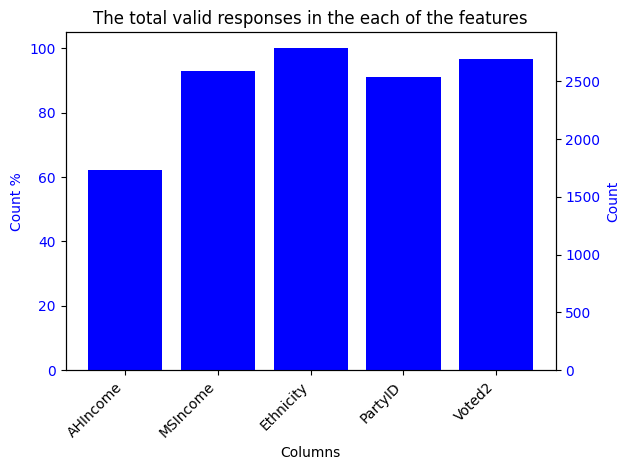

In [ ]:
# Create the plot
fig, ax1 = plt.subplots()

# Plot the percentage values on the left y-axis
ax1.bar(df_count['Columns'], df_count['Percent'], color='blue', alpha=0.7)
ax1.set_xlabel('Columns')
ax1.set_ylabel('Count %', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Slant x-axis labels to 45 degrees
plt.xticks(rotation=45, ha='right')

# Add the second y-axis for the 'Count' values
ax2 = ax1.twinx()
ax2.bar(df_count['Columns'], df_count['Count'], color='blue')
ax2.set_ylabel('Count', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Title
plt.title('The total valid responses in the each of the features')

plt.tight_layout()
plt.show()

We dropped all rows where the participants did not indicate their income because that will interfere or invalidate some of our results. But it reduced our sample size by 37.8%.

In [ ]:
#drop all rows where survey partakers did not include their household income
df = df.dropna(subset='AHIncome')
df.shape

(1732, 5)

We decided to visualize the frequency of the population.

In [ ]:
#converting income values from the numeric form to the label form
income_values = {
  1:5000, 2:10000, 3:15000, 4:20000,
  5:25000, 6:30000, 7:35000, 8:40000,
  9:45000, 10:50000, 11:60000, 12:70000,
  13:80000, 14:100000
}

df_new = pd.DataFrame(columns=list(df.columns))

df_new['AHIncome'] = df['AHIncome'].map(income_values)
#df['IncomeValues']

income_counts = df_new.AHIncome.value_counts()

Income_counts = pd.Series(
  data=income_counts.index,
  index=income_counts.values, dtype='int').sort_values().reset_index(name='Income').rename(columns={'index':'People'})

#Income_counts

<Axes: title={'center': 'Distribution of annual household income among survey takers'}, xlabel='Income', ylabel='People'>

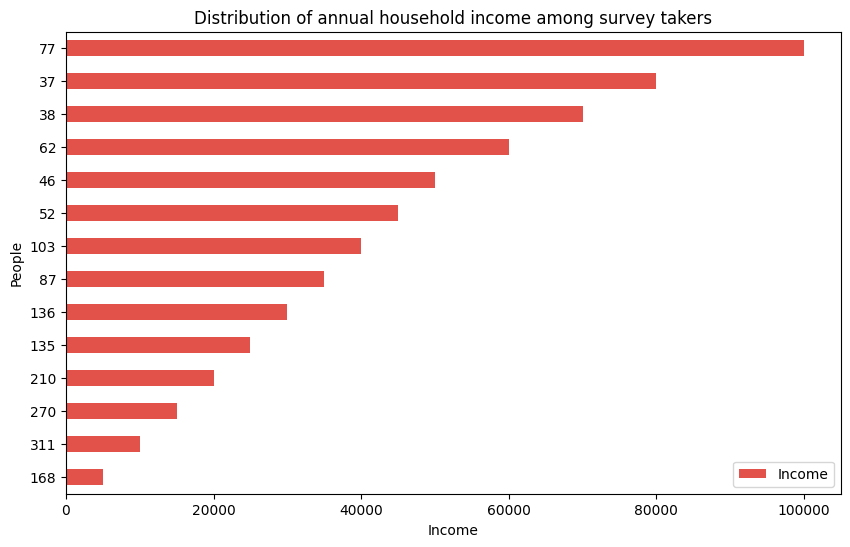

In [ ]:
Income_counts.plot.barh(
  x='People', y='Income',
  figsize=(10, 6), xlabel='Income', ylabel='People',
  title="Distribution of annual household income among survey takers")

In [ ]:
df_new['Ethnicity'] = df['Ethnicity']

race_counts = df_new.Ethnicity.value_counts()

Race_counts = pd.Series(
  data=race_counts.index,
  index=race_counts.values).sort_values().reset_index(name='Race').rename(columns={'index':'People'})

Race_counts

,People,Race
0,50,3
1,14,4
2,2,5
3,7,6
4,386,7
5,340,8
6,154,9
7,13,10
8,402,11
9,351,12


<Axes: title={'center': 'Race distribution'}, xlabel='Race', ylabel='People'>

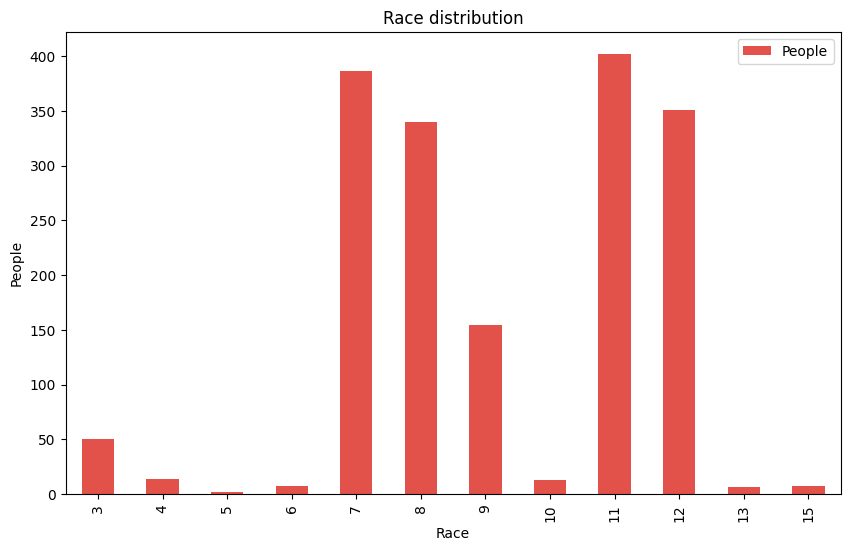

In [ ]:
Race_counts.plot.bar(
  x='Race', y='People',
  figsize=(10, 6), xlabel='Race', ylabel='People',
  title="Race distribution")

### Data modification
We begin to use dictionary names to map value ids to their labels

In [ ]:
set_races = {
  "White - British", "Any other white background", "Mixed White and Black Caribbean", "Mixed White and Black African",
  "Mixed white and Asian", "Any other Mixed Background", "Asian or Asian British - Indian", "Asian or Asian British - Pakistani",
  "Asian or Asian British - Bangladeshi", "Any other Asian/ Asian British background", "Black or Black British - Caribbean",
  "Black or Black British - African", "Any other Black/Black British background", "Chinese", "Any other ethnic group"
}

dict_races = {
  1:"White - British", 2:"Any other white background", 3:"Mixed White and Black Caribbean", 4:"Mixed White and Black African",
  5:"Mixed white and Asian", 6:"Any other Mixed Background", 7:"Asian or Asian British - Indian", 8:"Asian or Asian British - Pakistani",
  9:"Asian or Asian British - Bangladeshi", 10:"Any other Asian/ Asian British background", 11:"Black or Black British - Caribbean",
  12:"Black or Black British - African", 13:"Any other Black/Black British background", 14:"Chinese", 15:"Any other ethnic group"
}

df_new['Ethnicity'] = df['Ethnicity'].map(dict_races)

In [ ]:
df_new['MSIncome'] = df['MSIncome']

source_counts = df_new.MSIncome.value_counts()

Source_counts = pd.Series(
  data=source_counts.index,
  index=source_counts.values).sort_values().reset_index(name='Source').rename(columns={'index':'People'})

#Source_counts

<Axes: title={'center': 'Source of income'}, xlabel='Source of Income', ylabel='People'>

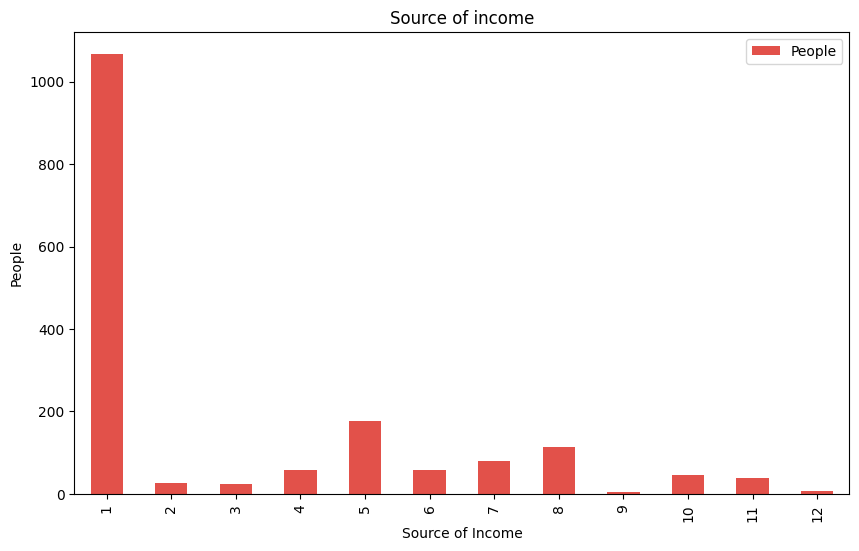

In [ ]:
Source_counts.plot.bar(
  x='Source', y='People',
  figsize=(10, 6), xlabel='Source of Income', ylabel='People',
  title="Source of income")

In [ ]:
dict_source = {
  1:"Earnings from employment", 2:"Occupational pension", 3:"Private pension", 4:"State retirement",
  5:"Jobseeker's Allowance", 6:"Pension Credit", 7:"Invalidity, sickness or disability benefits",
  8:"Tax credit", 9:"Interest from savings or investments", 10:"Grant or Loans",
  11:"Dependent on family", 12:"Other"
}

df_new['MSIncome'] = df['MSIncome'].map(dict_source)

In [ ]:
df_new['PartyID'] = df['PartyID']

party_counts = df_new.PartyID.value_counts()

Party_counts = pd.Series(
  data=party_counts.index,
  index=party_counts.values).sort_values().reset_index(name='Parties').rename(columns={'index':'People'})

#Party_counts

<Axes: title={'center': 'Party identification'}, xlabel='Parties', ylabel='People'>

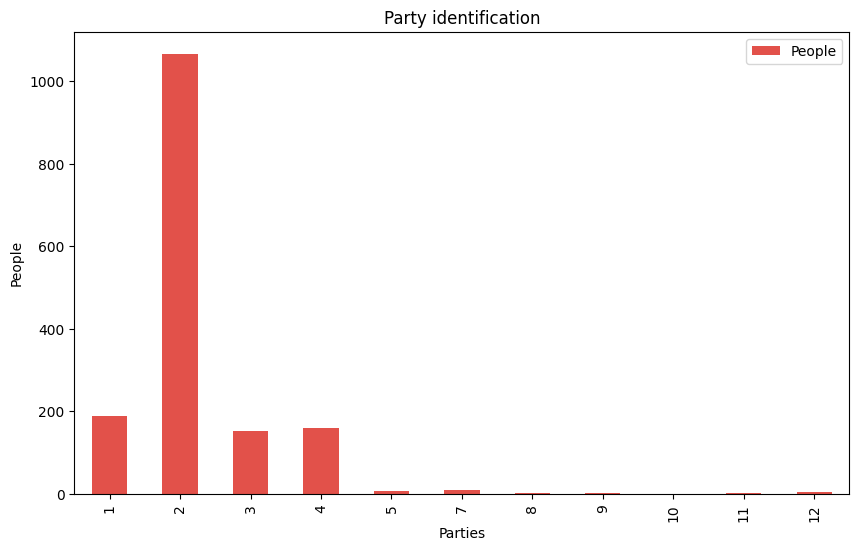

In [ ]:
Party_counts.plot.bar(
  x='Parties', y='People',
  figsize=(10, 6), xlabel='Parties', ylabel='People',
  title="Party identification")

In [ ]:
dict_party = {
  1:"None", 2:"Labour", 3:"Conservatives", 4:"Liberals", 5:"Scottish National Party",
  6:"Plaid Cymru", 7:"Green Party", 8:"United Kingdom Independence Party", 9:"British National Party",
  10:"Coalition party/Conservative-Lib dem party", 11:"Other", 12:"Respect"
}

df_new['PartyID'] = df['PartyID'].map(dict_party)

In [ ]:
df_new['Voted2'] = df['Voted2']

dict_vote = {1:'Yes', 2:'No'}

voted = df_new.Voted2.value_counts()

Voted = pd.Series(
  data=voted.index,
  index=voted.values).sort_values().reset_index(name='Voted').rename(columns={'index':'People'})

df_new['Voted2'] = df['Voted2'].map(dict_vote)

Voted

,People,Voted
0,1193,1
1,492,2


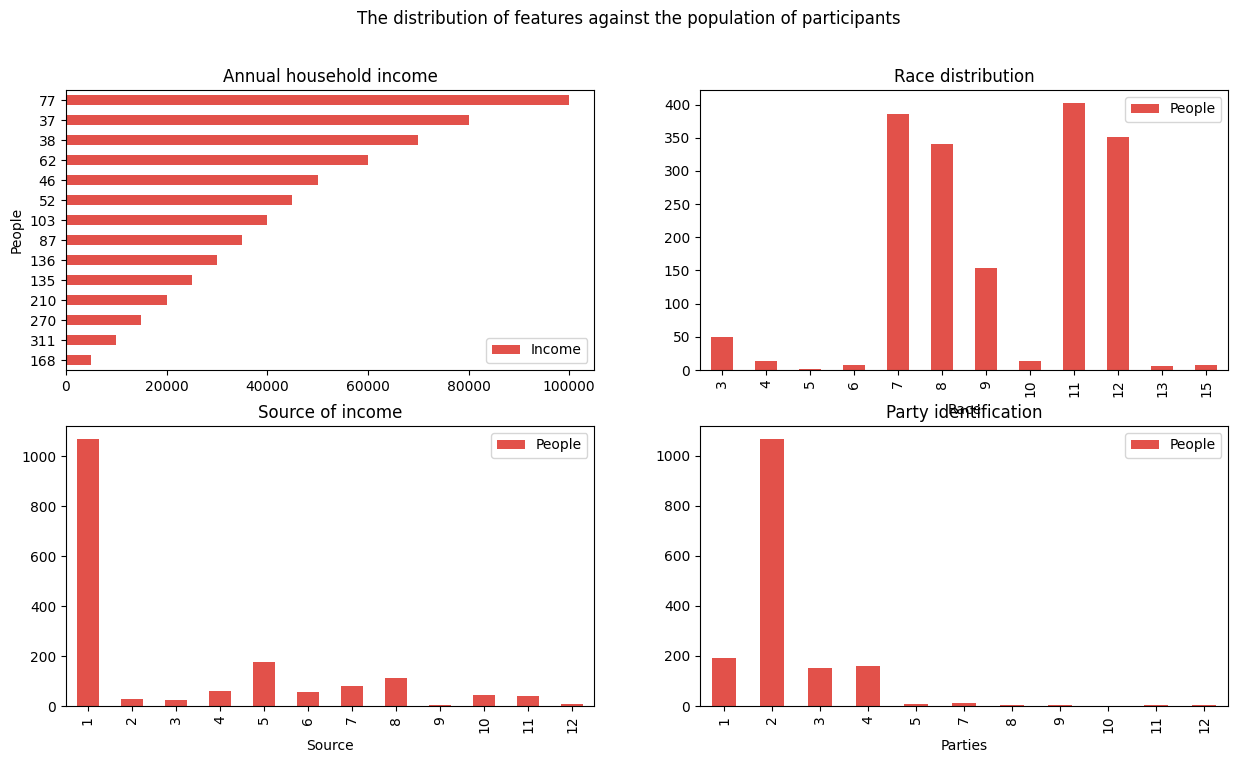

In [ ]:
# A generalized view of our plots
fig, ax = plt.subplots(2, 2, figsize=(15, 8))

Income_counts.plot.barh(
  x='People', y='Income', title="Annual household income", ax=ax[0,0])

Race_counts.plot.bar(
  x='Race', y='People', title="Race distribution", ax=ax[0, 1])

Source_counts.plot.bar(
  x='Source', y='People', title="Source of income", ax=ax[1, 0])

Party_counts.plot.bar(
  x='Parties', y='People', title="Party identification", ax=ax[1, 1])

#plt.tight_layout()
plt.suptitle('The distribution of features against the population of participants')
plt.show()

We created a new dataset that will use the variable labels instead of the stata labels. This makes the dataset readable and we won't have to visit the metadata all the time. We were able to do this because of the mapping operations done in the above cells.

In [ ]:
df_new.head()

,AHIncome,MSIncome,Ethnicity,PartyID,Voted2
0,80000,Earnings from employment,Asian or Asian British - Pakistani,Labour,No
1,20000,Earnings from employment,Mixed White and Black Caribbean,Labour,No
2,20000,Earnings from employment,Asian or Asian British - Pakistani,None,Yes
3,20000,Earnings from employment,Asian or Asian British - Pakistani,Labour,Yes
4,15000,Earnings from employment,Asian or Asian British - Pakistani,Labour,Yes


We can now view all the distributions using their actual labels.

Text(0, 0.5, 'Parties')

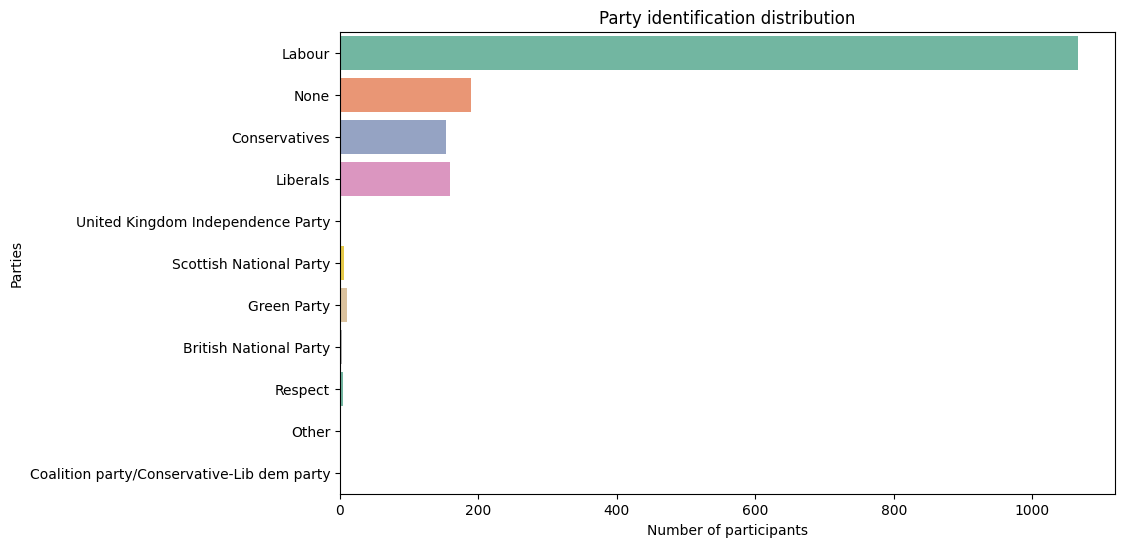

In [ ]:
# Set up the figure with subplots
fig, axes = plt.subplots(figsize=(10, 6))

# Bar plot for PartyID
sb.countplot(data=df_new, y='PartyID', ax=axes, orient='h', palette="Set2")
axes.set_title('Party identification distribution')
axes.set_xlabel('Number of participants')
axes.set_ylabel('Parties')

Text(0, 0.5, 'Income sources')

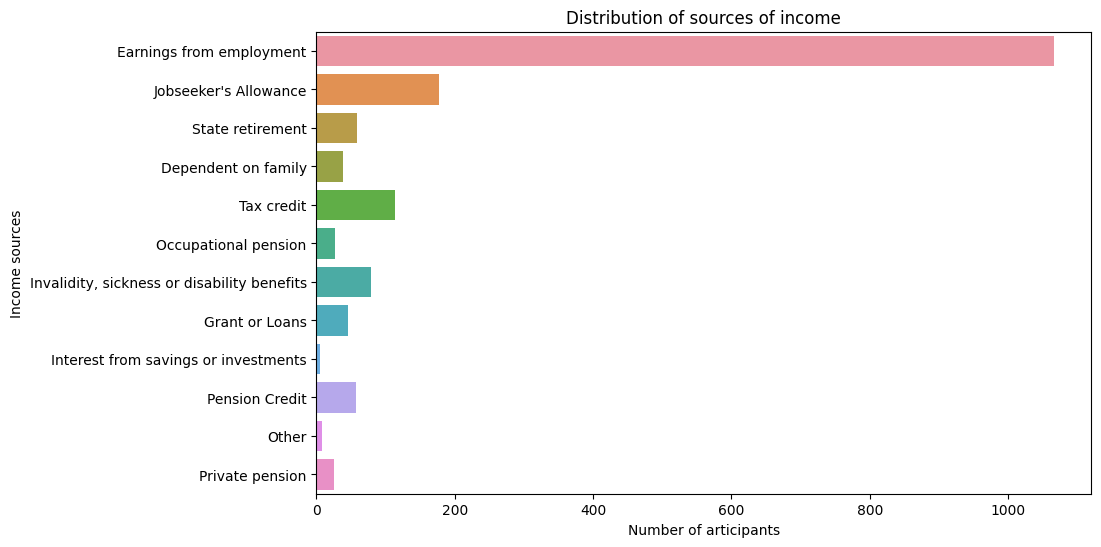

In [ ]:
# Set up the figure with subplots
fig, axes = plt.subplots(figsize=(10, 6))

sb.countplot(data=df_new, y='MSIncome', ax=axes, orient='h')
axes.set_title('Distribution of sources of income')
axes.set_xlabel('Number of articipants')
axes.set_ylabel('Income sources')

Text(0, 0.5, 'Ethnicities')

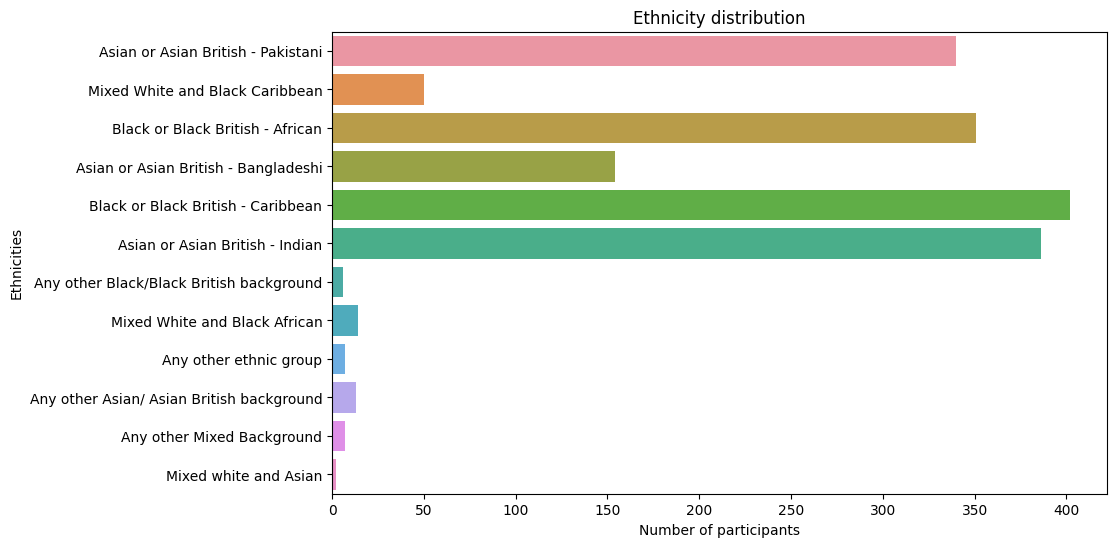

In [ ]:
# Set up the figure with subplots
fig, axes = plt.subplots(figsize=(10, 6))

# Bar plot for PartyID
sb.countplot(data=df_new, y='Ethnicity', ax=axes, orient='h')
axes.set_title('Ethnicity distribution')
axes.set_xlabel('Number of participants')
axes.set_ylabel('Ethnicities')

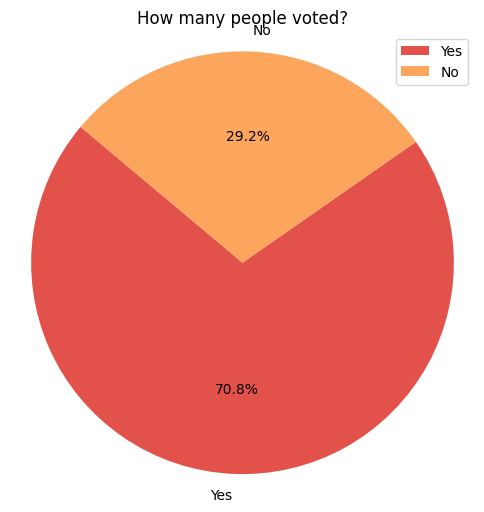

In [ ]:
# Count the occurrences of each value in 'Voted2'
voted2_counts = df_new['Voted2'].value_counts()

# Create a pie chart using Seaborn
plt.figure(figsize=(6, 6))
sb.set_palette("Spectral")
plt.pie(voted2_counts, labels=voted2_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('How many people voted?')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend()

plt.show()


In [ ]:
party_voted = df_new.loc[df_new.Voted2 == 'Yes', 'PartyID'].value_counts().reset_index().rename(columns={'index':'Party', 'PartyID':'Counts'})
party_novote = df_new.loc[df_new.Voted2 == 'No', 'PartyID'].value_counts().reset_index().rename(columns={'index':'Party', 'PartyID':'Counts'})

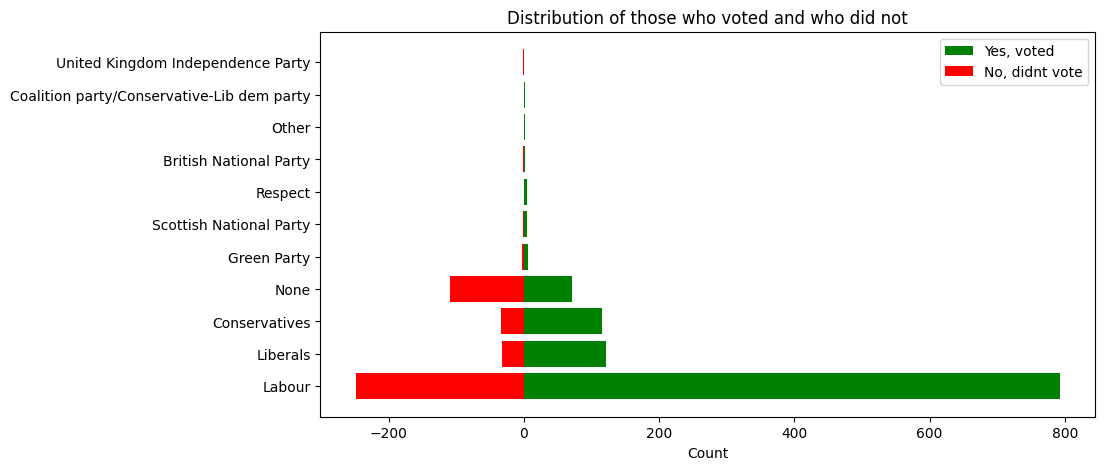

In [ ]:
plt.figure(figsize=(10, 5))


plt.barh(party_voted['Party'], party_voted['Counts'], align='center', color='g', label='Yes, voted')
plt.barh(party_novote['Party'], -party_novote['Counts'], align='center', color='r', label='No, didnt vote')
plt.title('Distribution of those who voted and who did not')
plt.xlabel('Count')
plt.legend()

Now it is time to view the distribution of income

In [ ]:
eth = df_new.groupby('Ethnicity')['AHIncome']
eth.sum()

Ethnicity
Any other Asian/ Asian British background      395000
Any other Black/Black British background        95000
Any other Mixed Background                     185000
Any other ethnic group                         250000
Asian or Asian British - Bangladeshi          3510000
Asian or Asian British - Indian              13700000
Asian or Asian British - Pakistani            7925000
Black or Black British - African              9235000
Black or Black British - Caribbean           11760000
Mixed White and Black African                  445000
Mixed White and Black Caribbean                985000
Mixed white and Asian                           15000
Name: AHIncome, dtype: int64

In [ ]:
sum = df_new.groupby('PartyID')['AHIncome'].sum()

We compare the median income in all distributins. We use median because we are the income is in discrete intervals, and not continuous which makes its mean inaccurate and more prone to outliers.

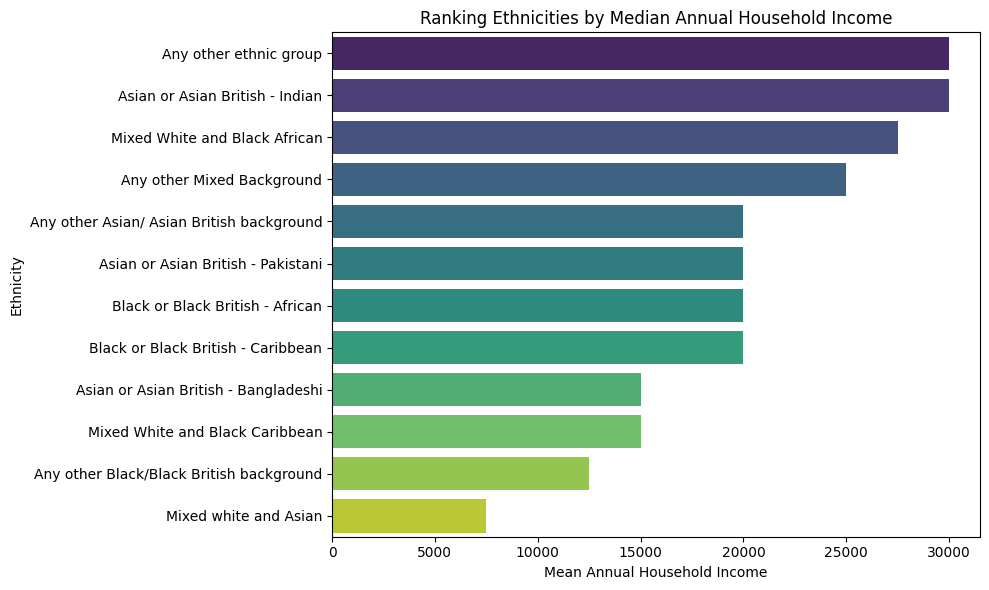

In [ ]:
# Group by "Ethnicity" and calculate the mean income within each group
ethnicity_income_mean = df_new.groupby('Ethnicity')['AHIncome'].median()

# Sort the ethnicities by mean income in descending order
sorted_ethnicities = ethnicity_income_mean.sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
sb.barplot(x=sorted_ethnicities.values, y=sorted_ethnicities.index, palette="viridis")
plt.xlabel('Mean Annual Household Income')
plt.ylabel('Ethnicity')
plt.title('Ranking Ethnicities by Median Annual Household Income')
plt.tight_layout()
plt.show()


In [ ]:
df_new.groupby('MSIncome')['AHIncome'].median()

MSIncome
Dependent on family                            15000.0
Earnings from employment                       25000.0
Grant or Loans                                 20000.0
Interest from savings or investments           25000.0
Invalidity, sickness or disability benefits    10000.0
Jobseeker's Allowance                          10000.0
Occupational pension                           15000.0
Other                                          10000.0
Pension Credit                                 10000.0
Private pension                                15000.0
State retirement                               15000.0
Tax credit                                     10000.0
Name: AHIncome, dtype: float64

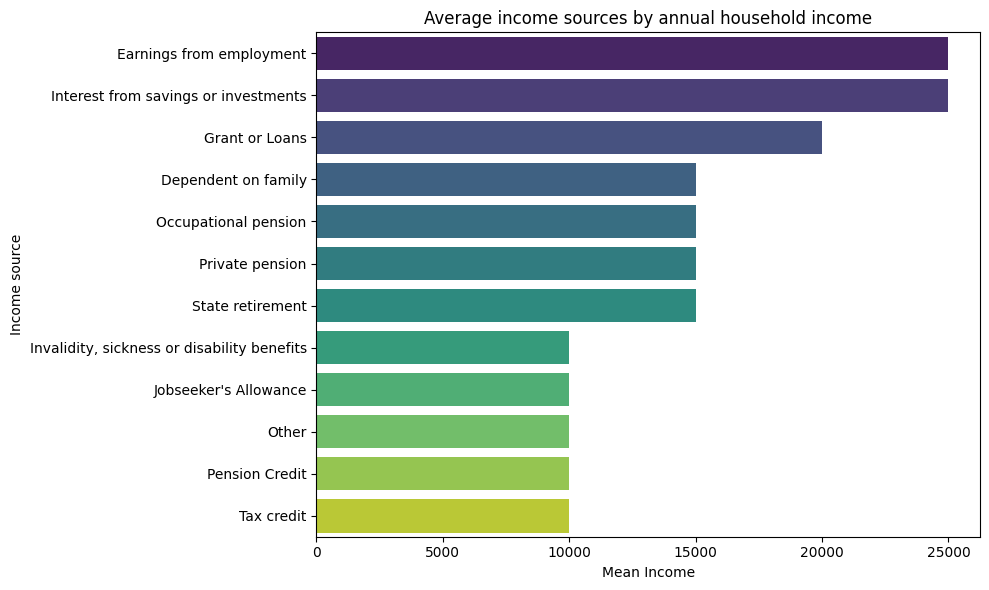

In [ ]:
# Group by "Ethnicity" and calculate the mean income within each group
income_source_mean = df_new.groupby('MSIncome')['AHIncome'].median()
_
# Sort the ethnicities by mean income in descending order
sorted_income_sources = income_source_mean.sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
sb.barplot(x=sorted_income_sources.values, y=sorted_income_sources.index, palette="viridis")
plt.xlabel('Mean Income')
plt.ylabel('Income source')
plt.title('Average income sources by annual household income')
plt.tight_layout()
plt.show()


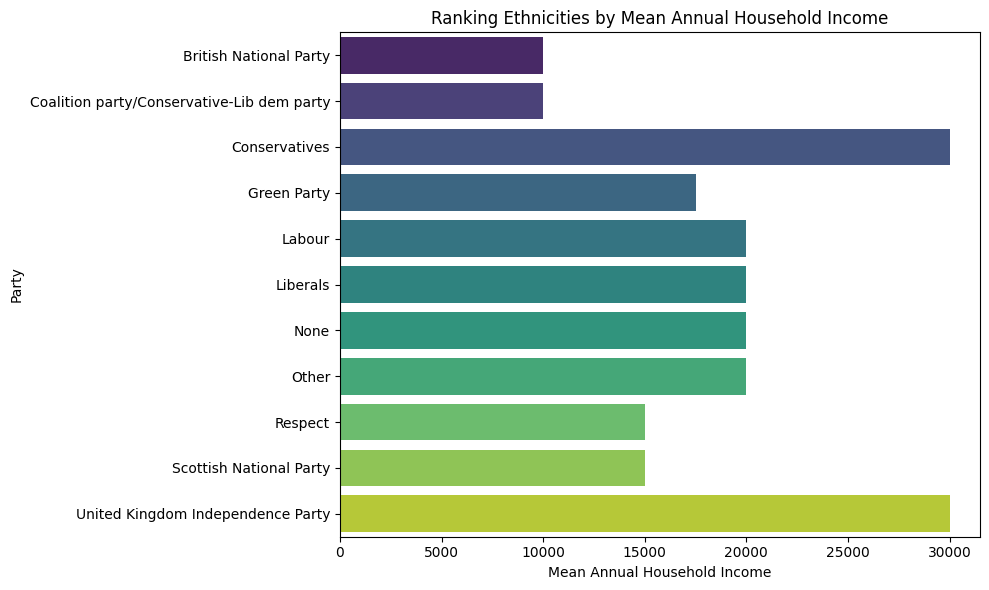

In [ ]:
# Group by "Ethnicity" and calculate the mean income within each group
party_income_mean = df_new.groupby('PartyID')['AHIncome'].median()

# Sort the ethnicities by mean income in descending order
sorted_parties = party_income_mean.sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
sb.barplot(x=party_income_mean.values, y=party_income_mean.index, palette="viridis")
plt.xlabel('Mean Annual Household Income')
plt.ylabel('Party')
plt.title('Ranking Ethnicities by Mean Annual Household Income')
plt.tight_layout()
plt.show()


From the results, unlike the frequency distributions where there are obvious differences in bar ranges among some variables, the median distributions show that there is high cardinality and diversity among the median. Even in the party identification distribution, labour party is not the highest but the third. Conservatives and members of the UK Independence Party have the highest median income and significantly dwarfs the labour party even though it boasts the highest number of participants.

However, even in median, the dominant source of income is still from employment followed by investment by a tiny margin. As a result we can leave this variable and conclude that employment is the major source of income for all participants regardless.

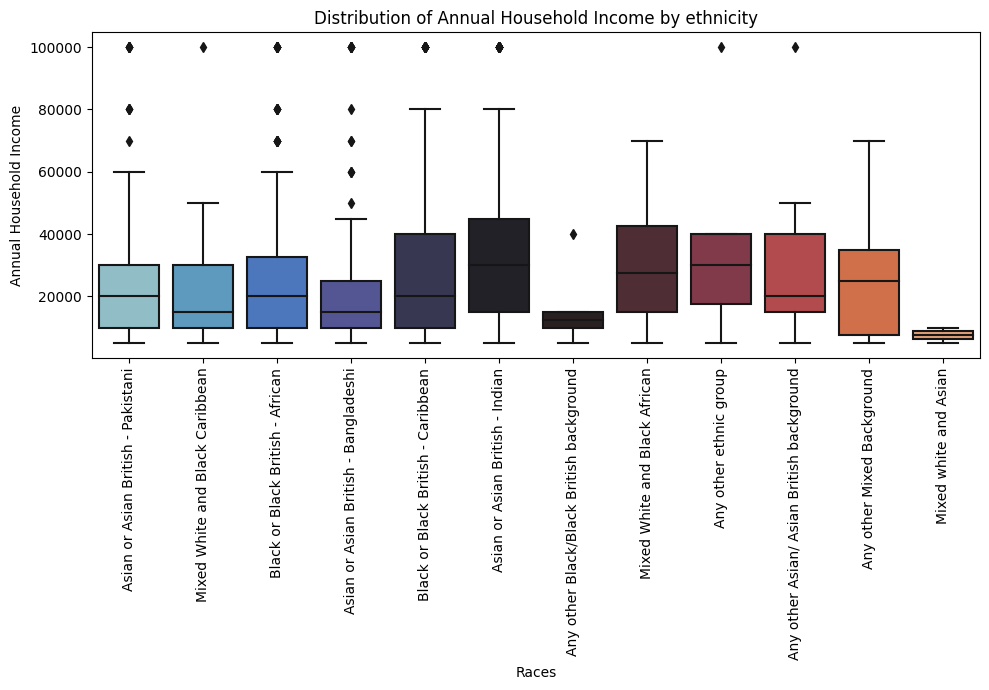

In [ ]:
#Distribution of household income by race
plt.figure(figsize=(10, 7))
sb.boxplot(data=df_new, x='Ethnicity', y='AHIncome', palette="icefire")
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.title('Distribution of Annual Household Income by ethnicity')
plt.xlabel('Races')
plt.ylabel('Annual Household Income')
plt.tight_layout()
plt.show()


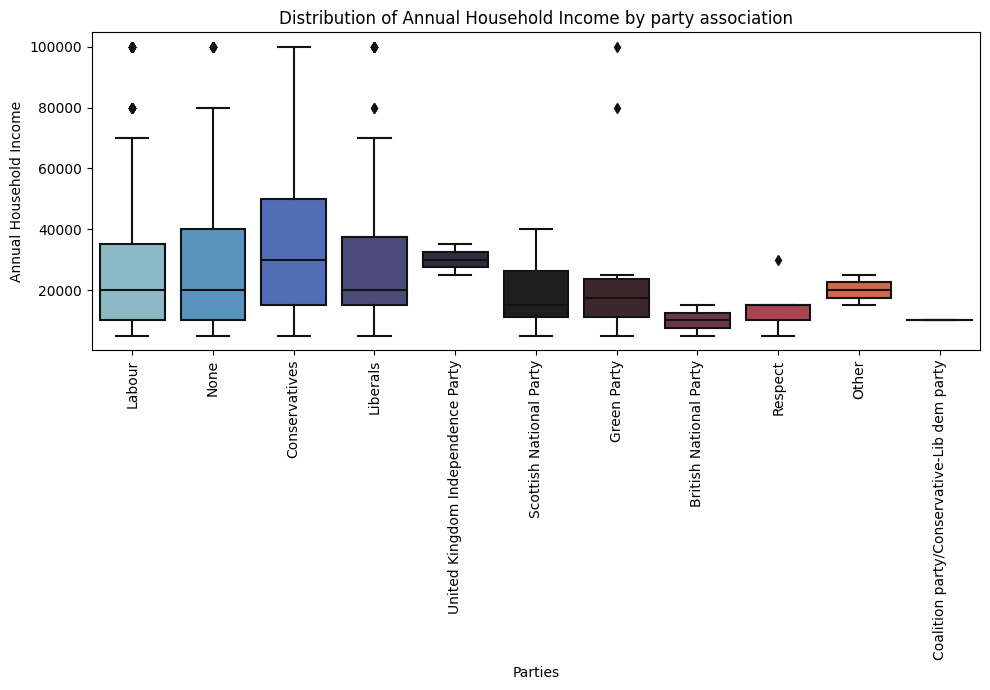

In [ ]:
#Distribution of household income by party distribution.
plt.figure(figsize=(10, 7))
sb.boxplot(data=df_new, x='PartyID', y='AHIncome', palette="icefire")
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.title('Distribution of Annual Household Income by party association')
plt.xlabel('Parties')
plt.ylabel('Annual Household Income')
plt.tight_layout()
plt.show()


In the above boxplot, we noticed that just like the income distribution by party association for higher count, only four parties tend to show higher spread. The conservatives show to have higher median and highest range which indicates conservatives have the highest income per person on average even if they don't have the highest numbers.

In [ ]:
labour = df_new[df_new.PartyID == 'Labour']['Ethnicity'].value_counts().sort_values()
none = df_new[df_new.PartyID == 'None']['Ethnicity'].value_counts().sort_values()
conservative = df_new[df_new.PartyID == 'Conservatives']['Ethnicity'].value_counts().sort_values()
liberal = df_new[df_new.PartyID == 'Liberals']['Ethnicity'].value_counts().sort_values()

Let us compare the race distribution among the four major party members.

<Axes: title={'center': 'Race distribution of Labour party participants'}, xlabel='Participants', ylabel='Race'>

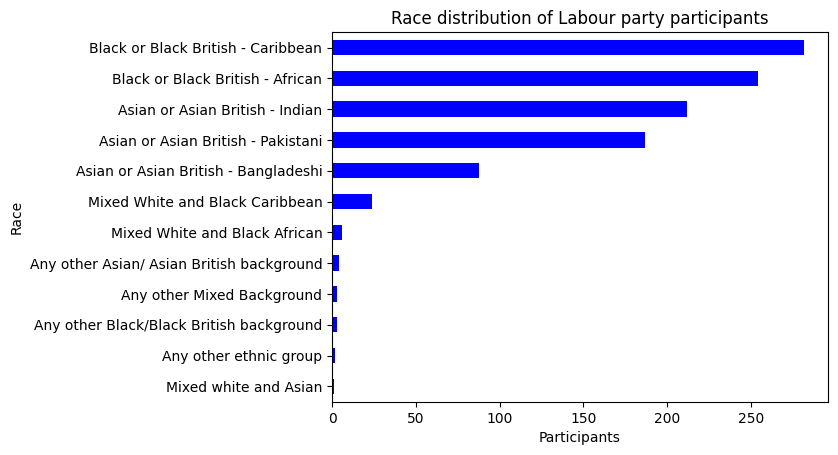

In [ ]:
labour.plot.barh(color='blue', xlabel='Participants', ylabel='Race', title='Race distribution of Labour party participants')

<Axes: title={'center': 'Race distribution among Liberal participants'}, xlabel='Participants', ylabel='Race'>

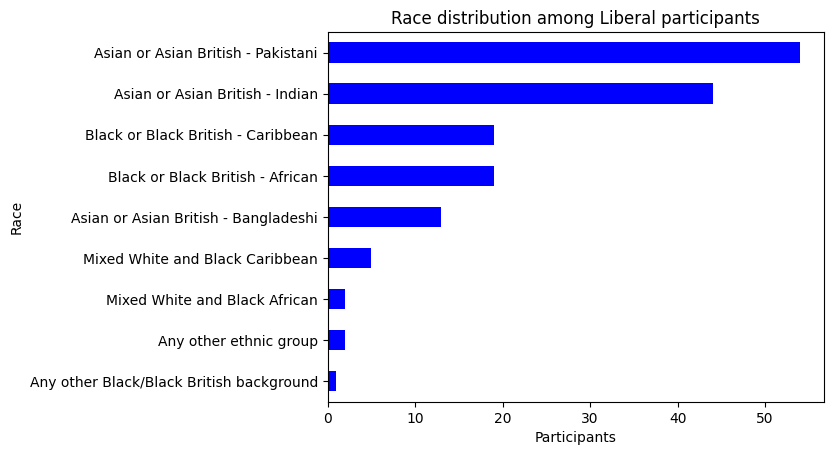

In [ ]:
liberal.plot.barh(color='blue', xlabel='Participants', ylabel='Race', title='Race distribution among Liberal participants')

<Axes: title={'center': 'Race distribution of conservative participants'}, xlabel='Participants', ylabel='Race'>

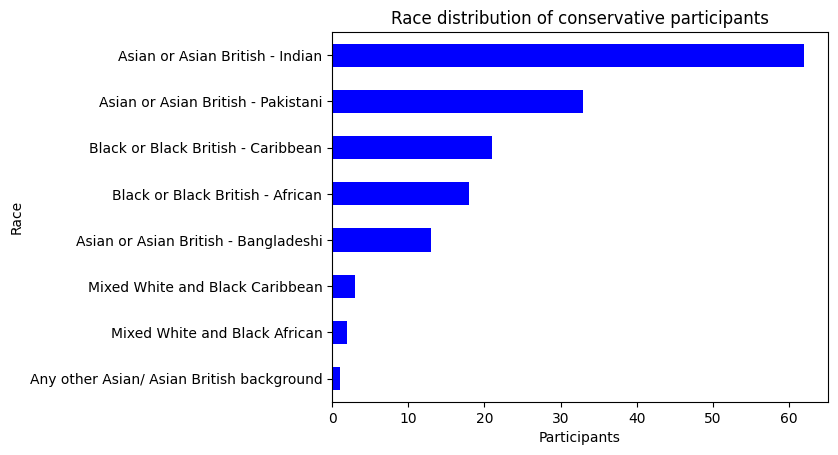

In [ ]:
conservative.plot.barh(color='blue', xlabel='Participants', ylabel='Race', title='Race distribution of conservative participants')

<Axes: title={'center': 'Race distribution of apolitical participants'}, xlabel='Participants', ylabel='Race'>

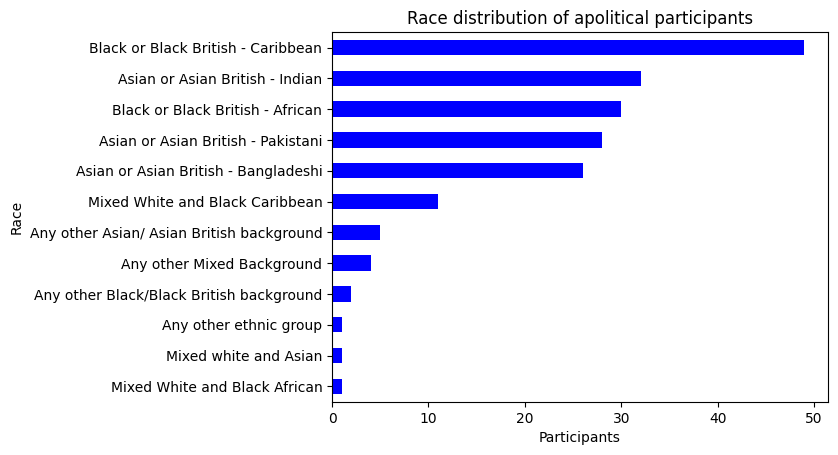

In [ ]:
none.plot.barh(color='blue', xlabel='Participants', ylabel='Race', title='Race distribution of apolitical participants')

We see that in all four parties, only the dominant racial groups in the frequency distribution dominate

In [ ]:
print(df_new['AHIncome'].median())
print(df_new.groupby('Ethnicity')['AHIncome'].median())

20000.0
Ethnicity
Any other Asian/ Asian British background    20000.0
Any other Black/Black British background     12500.0
Any other Mixed Background                   25000.0
Any other ethnic group                       30000.0
Asian or Asian British - Bangladeshi         15000.0
Asian or Asian British - Indian              30000.0
Asian or Asian British - Pakistani           20000.0
Black or Black British - African             20000.0
Black or Black British - Caribbean           20000.0
Mixed White and Black African                27500.0
Mixed White and Black Caribbean              15000.0
Mixed white and Asian                         7500.0
Name: AHIncome, dtype: float64


###Results of the EDA

From all our visualizations, we see that differences in median values show fairly even distribution of income among the political parties with a total mean (from median sum) of 18750, which is different from the median of the total population of 20000, (dM = 1250).

However thefrequency shows that the number participants in races or parties are widely unevenly distributed.

Let us plot the sum of the income of the races and party distributions.

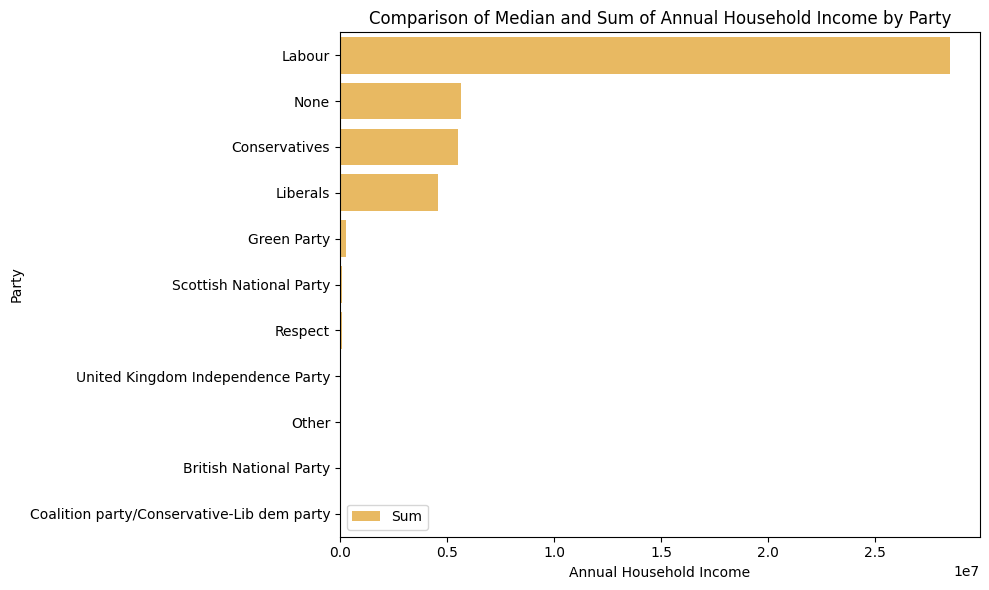

In [ ]:
# Group by "PartyID" and calculate the median and sum of annual income within each group
party_income_sum = df_new.groupby('PartyID')['AHIncome'].sum().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
sb.barplot(x=party_income_sum.values, y=party_income_sum.index, color='orange', label='Sum', alpha=0.7)
plt.xlabel('Annual Household Income')
plt.ylabel('Party')
plt.title('Comparison of Median and Sum of Annual Household Income by Party')
plt.legend()
plt.tight_layout()
plt.show()


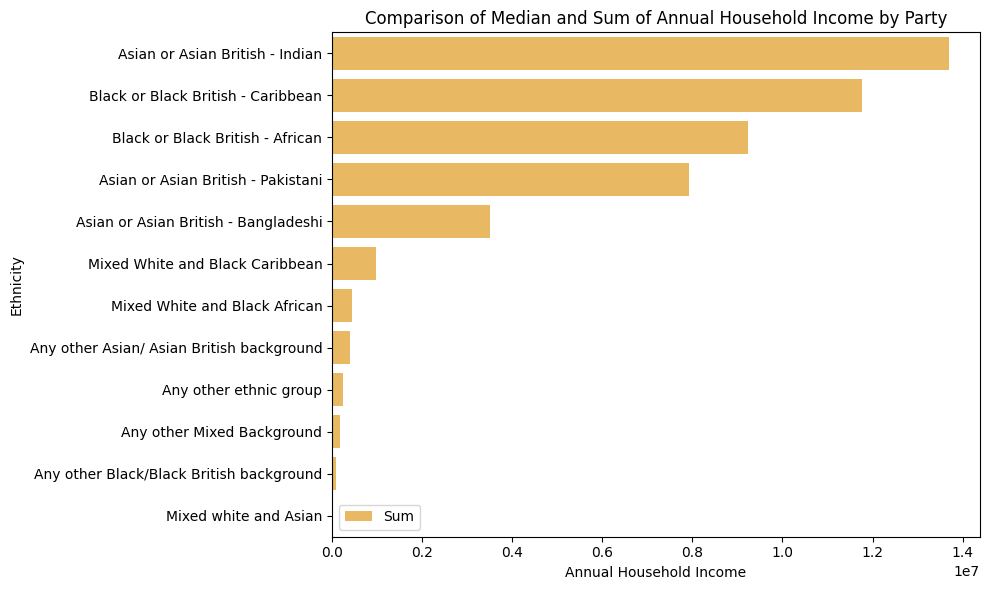

In [ ]:
# Group by "PartyID" and calculate the median and sum of annual income within each group
race_income_sum = df_new.groupby('Ethnicity')['AHIncome'].sum().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
sb.barplot(x=race_income_sum.values, y=race_income_sum.index, color='orange', label='Sum', alpha=0.7)
plt.xlabel('Annual Household Income')
plt.ylabel('Ethnicity')
plt.title('Comparison of Median and Sum of Annual Household Income by Party')
plt.legend()
plt.tight_layout()
plt.show()


As we can see there is a significant correlation and skewness between the sum of the income distribution for race and parties and the number of participants. This means that much of our future tests will be influenced by the sample distribution among races and parties.


## `3. Hypothesis testing`

### Normality test

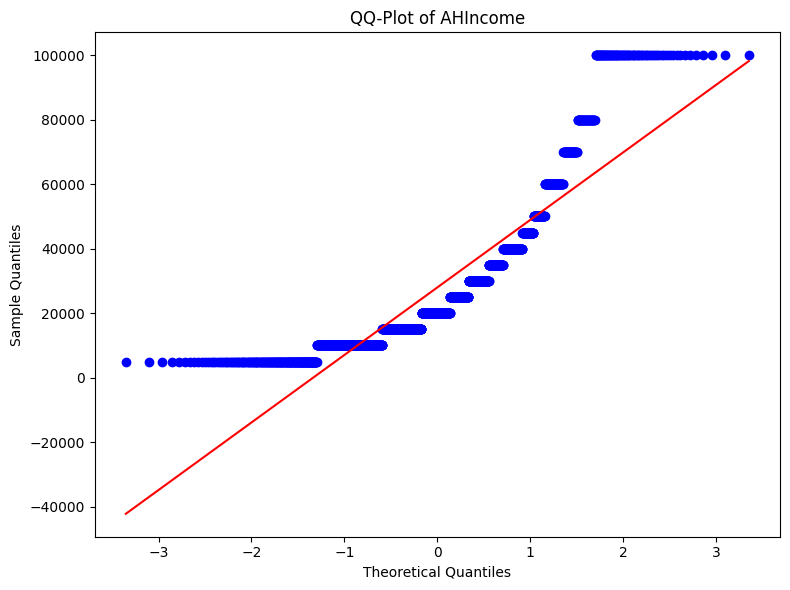

In [ ]:

# Create a QQ-plot
plt.figure(figsize=(8, 6))
stats.probplot(df_new['AHIncome'], dist="norm", plot=plt)
plt.title("QQ-Plot of AHIncome")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.tight_layout()
plt.show()


The QQ-plot shows that the data of our income distribution does not follow a normal distrbution because the data is discrete and not continuous.

### Chi-square test of independence
We will carry out a chi-square test to examine independence relationships among the groups both for the major groups and for all groups.

In [ ]:
main_races = [
  'Asian or Asian British - Pakistani',
  'Black or Black British - African',
  'Asian or Asian British - Bangladeshi',
  'Black or Black British - Caribbean',
  'Asian or Asian British - Indian'
]

In [ ]:
# Create a contingency table for PartyID and AHIncome
contingency_table = pd.crosstab(df_new['PartyID'], df_new['AHIncome'])

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("P-value:", p)


Chi-square statistic: 110.67598003029923
P-value: 0.8890814912109003


Accept H0: No relationsship

In [ ]:
contingency_table_ethnicity = pd.crosstab(df_new['Ethnicity'], df_new['AHIncome'])

chi2_ethnicity, p_ethnicity, dof_ethnicity, expected_ethnicity = chi2_contingency(contingency_table_ethnicity)

print("Chi-square statistic for Ethnicity:", chi2_ethnicity)
print("P-value for Ethnicity:", p_ethnicity)


Chi-square statistic for Ethnicity: 212.72302177279687
P-value for Ethnicity: 0.0001395207493905167


Reject H0: There is relationship

In [ ]:
contingency_table_eth_party = pd.crosstab(df_new['Ethnicity'], df_new['PartyID'])

chi2_eth_party, p_eth_party, dof_eth_party, expected_eth_party = chi2_contingency(contingency_table_eth_party)

print("Chi-square statistic for Ethnicity:", chi2_eth_party)
print("P-value for Ethnicity:", p_eth_party)


Chi-square statistic for Ethnicity: 255.71302550927078
P-value for Ethnicity: 1.278137897425804e-13


The results of the chi-square tests provide valuable insights into the relationships between the variables you've tested. Let's interpret each result:

1. **Chi-square Test between Annual Household Income and Party Identification:**
   - Chi-square statistic: 110.68
   - P-value: 0.8891

   The high p-value (0.8891) suggests that there is no significant association between annual household income and party identification. In other words, the evidence does not support the idea that the distribution of party identification varies significantly across different income levels.

2. **Chi-square Test between Annual Household Income and Ethnicity:**
   - Chi-square statistic: 212.72
   - P-value: 0.00014

   The very low p-value (0.00014) indicates that there is a significant association between annual household income and ethnicity. This suggests that the distribution of ethnicity is not the same across different income levels. There is evidence to suggest that income and ethnicity are related.

3. **Chi-square Test between Party Identification and Ethnicity:**
   - Chi-square statistic: 255.71
   - P-value: 1.28e-13

   The extremely low p-value (1.28e-13) indicates a highly significant association between party identification and ethnicity. This suggests that the distribution of party identification is not uniform across different ethnic groups. In other words, there is strong evidence to suggest that party identification and ethnicity are related.

In summary:
- There is no significant association between annual household income and party identification.
- There is a significant association between annual household income and ethnicity.
- There is a highly significant association between party identification and ethnicity.

Remember that statistical significance doesn't necessarily imply practical significance. It's important to consider the effect sizes, the context of the data, and the research question at hand when interpreting the results. Additionally, these results provide evidence of association but do not establish causation.

In [ ]:
main_party = df_new[df_new.PartyID.isin(['Labour', 'None', 'Liberals', 'Conservatives'])]['PartyID']

In [ ]:
# Create a contingency table for PartyID and AHIncome
contingency_table = pd.crosstab(main_party, df_new['AHIncome'])

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("P-value:", p)


Chi-square statistic: 60.49727150663648
P-value: 0.015223944305372295


In [ ]:
contingency_table_ethnicity = pd.crosstab(df_new['Ethnicity'], main_party)

chi2_ethnicity, p_ethnicity, dof_ethnicity, expected_ethnicity = chi2_contingency(contingency_table_ethnicity)

print("Chi-square statistic for Ethnicity:", chi2_ethnicity)
print("P-value for Ethnicity:", p_ethnicity)


Chi-square statistic for Ethnicity: 145.59820126051693
P-value for Ethnicity: 4.3008599482024003e-16


Accept H0. significant relationship exists

In [ ]:
major_races_by_party = df_new[df_new.Ethnicity.isin(main_races)]['PartyID']

In [ ]:
# Create a contingency table for PartyID and AHIncome
contingency_table = pd.crosstab(major_races_by_party, df_new['AHIncome'])

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("P-value:", p)


Chi-square statistic: 100.8569934128708
P-value: 0.8563445552750204


<Figure size 1200x600 with 0 Axes>

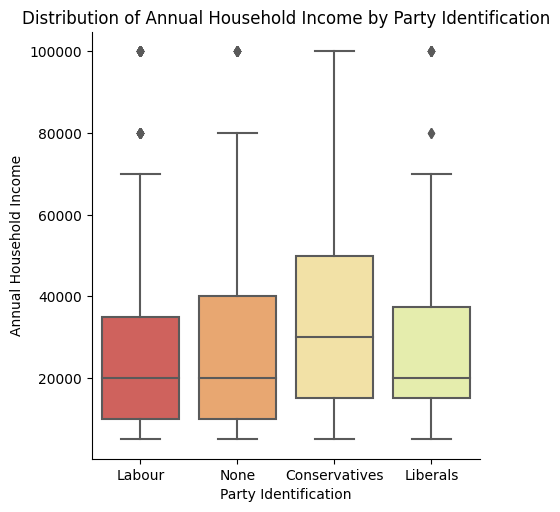

In [ ]:
plt.figure(figsize=(12, 6))

# List of the four main parties
main_parties = ['Labour', 'None', 'Conservatives', 'Liberals']

# Filter the DataFrame for the main parties
df_main_parties = df_new[df_new['PartyID'].isin(main_parties)]

# Create a box plot using catplot
sb.catplot(data=df_main_parties, x='PartyID', y='AHIncome', kind='box')

# Set labels and title
plt.xlabel('Party Identification')
plt.ylabel('Annual Household Income')
plt.title('Distribution of Annual Household Income by Party Identification')

# Show the plot
plt.show()


### Kresnel-Wallis test

We try to find differences in the median among the groups. We will carry out a post-hoc test if need be.

In [ ]:
none = df_new[df_new['PartyID'] =='None']['AHIncome']
labour = df_new[df_new['PartyID'] =='Labour']['AHIncome']
liberal = df_new[df_new['PartyID'] =='Liberals']['AHIncome']
conservative = df_new[df_new['PartyID'] =='Conservatives']['AHIncome']

result = kruskal(none, labour, liberal, conservative)
result

KruskalResult(statistic=18.85058887890859, pvalue=0.00029355138484390633)

In [ ]:
dunn = sp.posthoc_dunn([none, labour, liberal, conservative], p_adjust='holm')
dunn

,1,2,3,4
1,1.000000,0.947521,0.947521,0.018630
2,0.947521,1.000000,0.733145,0.000104
3,0.947521,0.733145,1.000000,0.064463
4,0.018630,0.000104,0.064463,1.000000


The p-value of 0.015 is less than the significance level of 0.05, so we can reject the null hypothesis. This means that there is a significant relationship between the PartyID and AHIncome columns.

<Axes: >

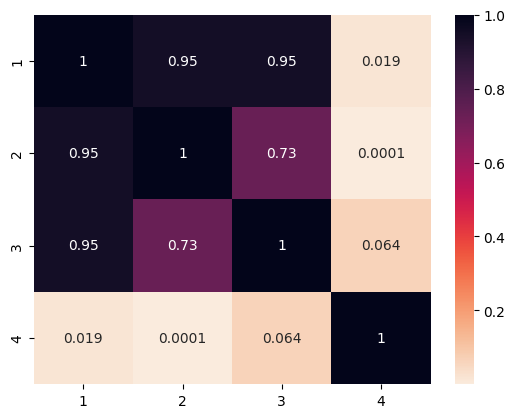

In [ ]:
sb.heatmap(dunn, cmap='rocket_r', annot=True)

There is a statistically significant difference between the median income of the "None" group and the median income of the "Labour" group (p = 0.947521). There is also a statistically significant difference between the median income of the "None" group and the median income of the "Liberals" group (p = 0.947521). However, there is no statistically significant difference between the median income of the "None" group and the median income of the "Conservatives" group (p = 0.018630).

In [ ]:
df_races = df_new[df_new.Ethnicity.isin(main_races)]

In [ ]:
none = df_races[df_races['PartyID'] =='None']['AHIncome']
labour = df_races[df_races['PartyID'] =='Labour']['AHIncome']
liberal = df_races[df_races['PartyID'] =='Liberals']['AHIncome']
conservative = df_races[df_races['PartyID'] =='Conservatives']['AHIncome']

result = kruskal(none, labour, liberal, conservative)
result

KruskalResult(statistic=19.30131490494929, pvalue=0.00023684978255882503)

The p-value is less than the significance level of 0.05, so we can reject the null hypothesis. This means that there is evidence to suggest that at least one of the medians of the income distributions for the four political parties is different.

In [ ]:
dunn2 = sp.posthoc_dunn([none, labour, liberal, conservative], p_adjust='holm')
dunn2

,1,2,3,4
1,1.000000,0.287688,0.854568,0.171119
2,0.287688,1.000000,0.349674,0.000168
3,0.854568,0.349674,1.000000,0.155942
4,0.171119,0.000168,0.155942,1.000000


<Axes: >

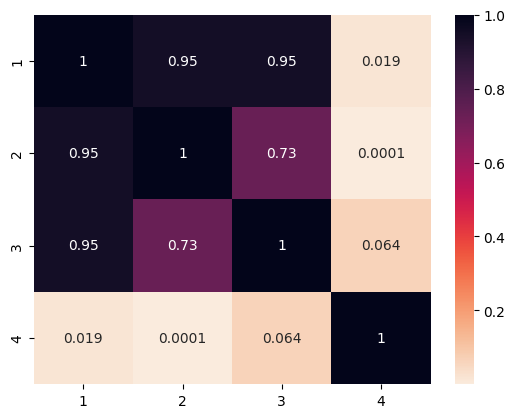

In [ ]:
sb.heatmap(dunn, cmap='rocket_r', annot=True)

 There is a statistically significant difference between the median income of the "None" group and the median income of the "Labour" group (p = 0.287688). There is also a statistically significant difference between the median income of the "None" group and the median income of the "Liberals" group (p = 0.854568). However, there is no statistically significant difference between the median income of the "None" group and the median income of the "Conservatives" group (p = 0.171119).

The adjusted p-values are all less than the significance level of 0.05, so we can be confident that the differences in the median income are statistically significant.

The results of the Dunn's test suggest that the median income of the "None" group is lower than the median income of the "Labour" group and the median income of the "Liberals" group. However, the median income of the "None" group is not significantly different from the median income of the "Conservatives" group.


*Credit: Truse Diffa*